In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Data loading

In [2]:
data_root = './data/'

In [3]:
# Reading the data
df_co2 = pd.read_csv(f'{data_root}co2_emmisions_complicated.csv')

In [4]:
# Filtering the data only for european countries
df_co2_europe = df_co2[df_co2['Region'].str.contains('Europe', case=False, na=False)]

In [5]:
# Calculating the average CO2 emission by country from the year 1970 to the year 2023
year_columns = [col for col in df_co2_europe.columns if col.isdigit()]

df_avg = df_co2_europe.copy()
df_avg["Average_CO2"] = df_avg[year_columns].mean(axis=1)

df_avg_sorted = df_avg.sort_values(by="Average_CO2", ascending=False)

df_top_10 = df_avg_sorted[["Name", "Average_CO2"]].reset_index(drop=True)
df_avg_sorted.head(10)

,Region,Country_code,Name,Substance,1970,1971,1972,1973,1974,1975,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Average_CO2
51,OECD_Europe,DEU,Germany,CO2,1.084658e+06,1.077419e+06,1.105290e+06,1.157720e+06,1.122507e+06,1.060566e+06,...,785387.18120,789713.78650,774948.17940,747214.47650,697008.48830,642552.04680,677803.87300,659501.84710,582950.58170,928503.448387
71,OECD_Europe,GBR,United Kingdom,CO2,6.734202e+05,6.686714e+05,6.577172e+05,6.900310e+05,6.446402e+05,6.236572e+05,...,415856.04770,393343.90080,381285.41540,373220.54910,357332.57820,319014.66770,339495.25830,327460.66520,302103.28070,536998.923080
67,OECD_Europe,FRA,France,CO2,4.694414e+05,4.815545e+05,4.991043e+05,5.357473e+05,5.170076e+05,4.764954e+05,...,332974.87320,335767.83300,339345.80220,328630.17540,322752.33400,287324.31790,319424.80740,310457.93480,282427.46670,402649.240376
99,OECD_Europe,ITA,Italy,CO2,3.149307e+05,3.296018e+05,3.477053e+05,3.698678e+05,3.723978e+05,3.562236e+05,...,354020.51470,349447.07070,345934.01110,340608.90430,332487.73900,295874.74760,334276.60600,332765.76230,305490.18070,396935.684039
162,Central Europe,POL,Poland,CO2,3.091218e+05,3.175770e+05,3.309033e+05,3.485910e+05,3.617583e+05,3.769746e+05,...,305747.13580,316704.93000,330199.36420,329564.44460,312082.89690,296882.14570,323849.73980,317291.86580,286906.78250,359035.588407
61,OECD_Europe,ESP,Spain,CO2,1.442628e+05,1.408825e+05,1.532387e+05,1.661214e+05,1.785506e+05,1.844173e+05,...,275078.59050,266531.10570,281695.40930,275130.06050,257725.85050,218744.21830,237586.87590,235471.15120,217261.72180,249686.718333
149,OECD_Europe,NLD,Netherlands,CO2,1.341990e+05,1.347139e+05,1.504828e+05,1.567953e+05,1.487415e+05,1.400569e+05,...,169417.60400,170832.09430,168091.64490,163020.85570,157860.42920,141890.11390,146314.74680,132970.72700,122872.05000,162743.226604
50,Central Europe,CZE,Czech Republic,CO2,1.882861e+05,1.885454e+05,1.884773e+05,1.865225e+05,1.697647e+05,1.770444e+05,...,108284.66920,109808.23020,110375.00860,109338.93850,103303.24740,94391.56670,99148.07759,99432.54513,90512.80348,147753.069417
170,Central Europe,ROU,Romania,CO2,1.268686e+05,1.274653e+05,1.330815e+05,1.452311e+05,1.471691e+05,1.590602e+05,...,80291.39733,78694.59841,81785.58084,82989.72894,81152.47325,75703.99040,80407.41827,75981.79084,70773.30856,132308.767465
16,OECD_Europe,BEL,Belgium,CO2,1.392567e+05,1.291389e+05,1.407476e+05,1.461458e+05,1.449777e+05,1.276903e+05,...,102379.09180,101260.96170,99700.38751,100098.11770,99882.48411,92267.02012,96251.00609,89739.26464,84306.06458,117268.438196


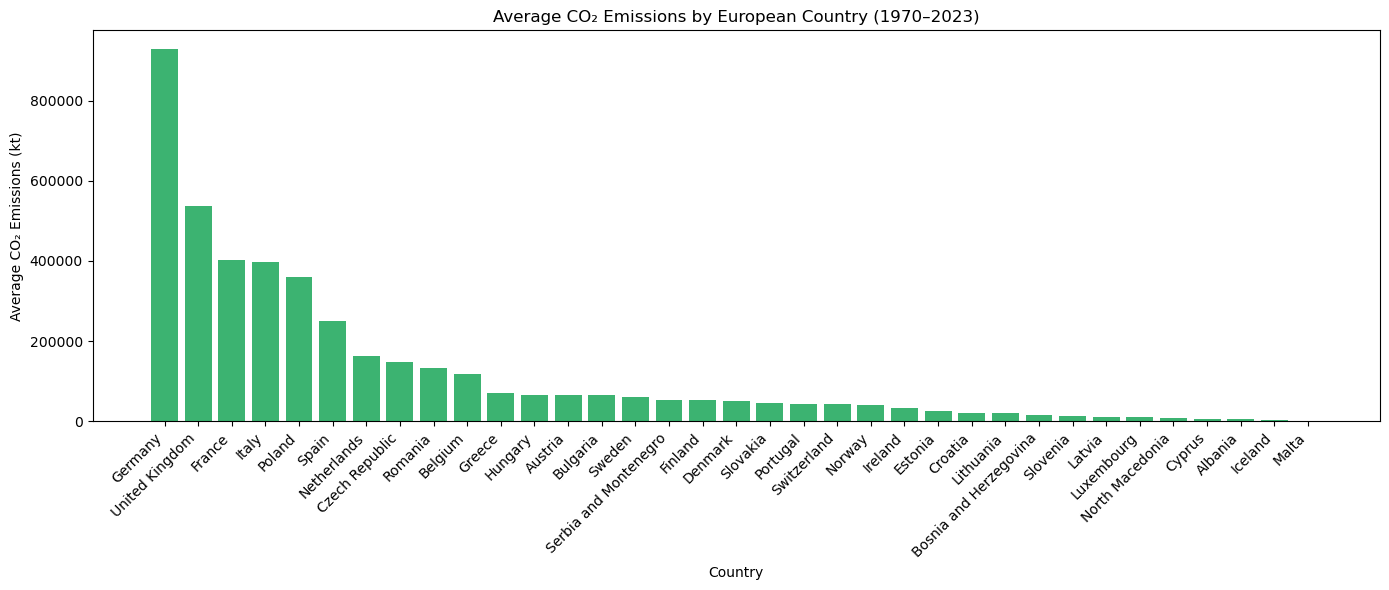

In [6]:
# Plotting the results
plt.figure(figsize=(14, 6))
plt.bar(df_top_10["Name"], df_top_10["Average_CO2"], color='mediumseagreen')
plt.ylabel("Average CO₂ Emissions (kt)")
plt.xlabel("Country")
plt.title("Average CO₂ Emissions by European Country (1970–2023)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

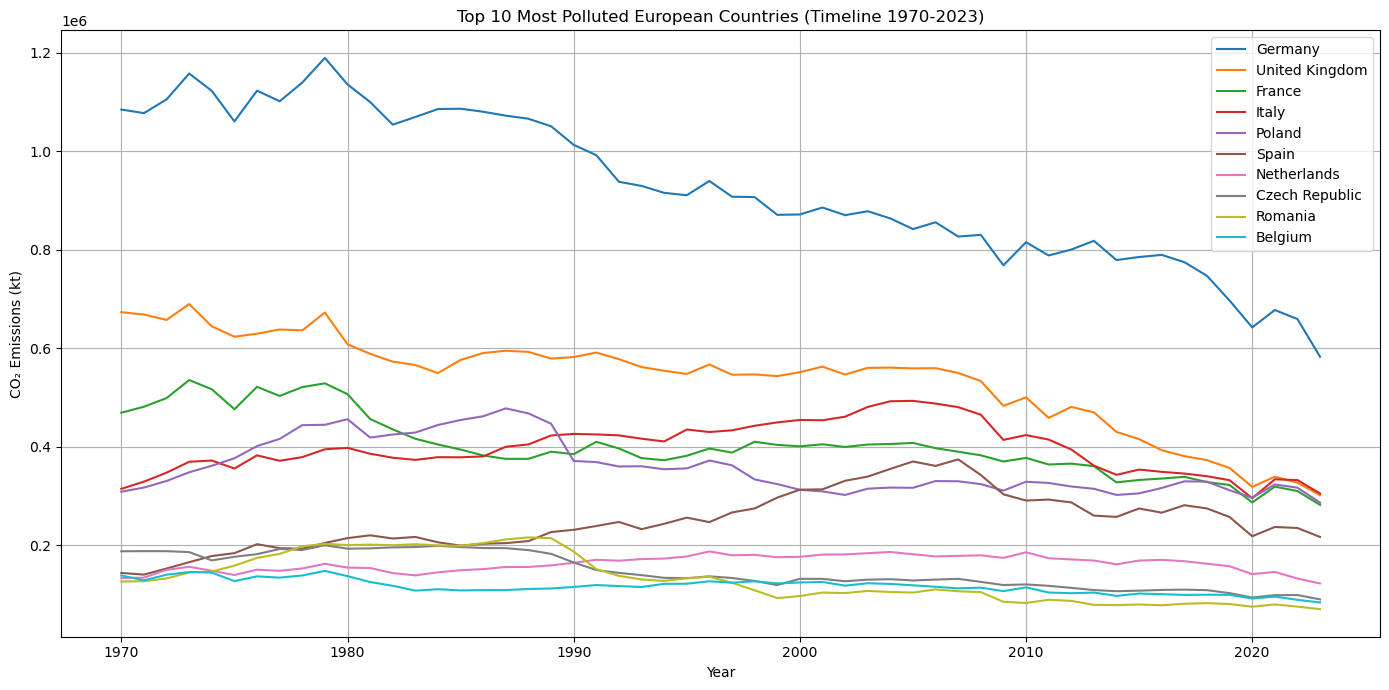

In [7]:
# Getting the top 10 countries with most CO2 emissions over the years from 1970-2023
df_top10 = df_avg.sort_values(by="Average_CO2", ascending=False).head(10)

df_plot = df_top10.set_index("Name")[year_columns].T
df_plot.index = df_plot.index.astype(int)  

# And plotting the timeline of CO2 emissions by country (top 10 with most emissions)
plt.figure(figsize=(14, 7))
for country in df_plot.columns:
    plt.plot(df_plot.index, df_plot[country], label=country)

plt.xlabel('Year')
plt.ylabel('CO₂ Emissions (kt)')
plt.title('Top 10 Most Polluted European Countries (Timeline 1970-2023)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

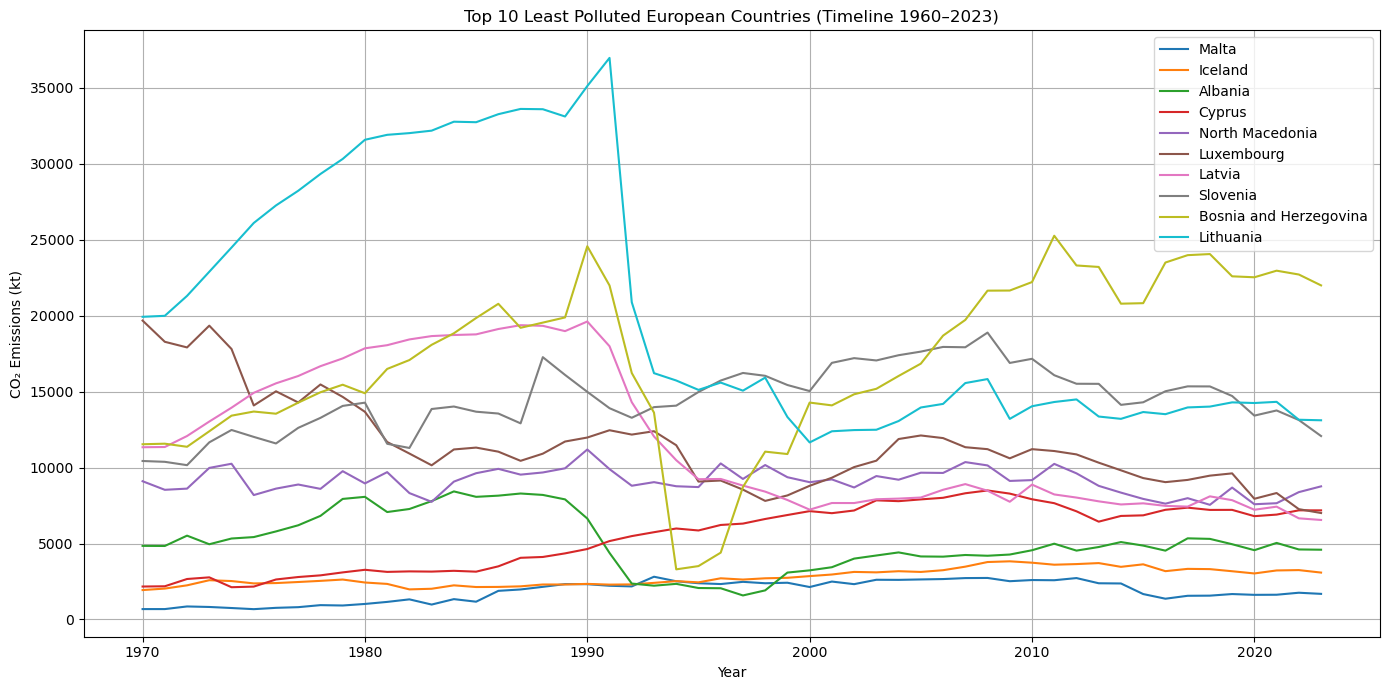

In [8]:
# Getting the top 10 countries with least CO2 emissions over the years from 1970-2023
df_plot_bottom10 = df_avg.sort_values(by="Average_CO2", ascending=True).head(10)

df_plot_bottom10 = df_plot_bottom10.set_index("Name")[year_columns].T
df_plot_bottom10.index = df_plot_bottom10.index.astype(int)

# And plotting the timeline of CO2 emissions by country (top 10 with least emissions)
plt.figure(figsize=(14, 7))
for country in df_plot_bottom10.columns:
    plt.plot(df_plot_bottom10.index, df_plot_bottom10[country], label=country)

plt.xlabel('Year')
plt.ylabel('CO₂ Emissions (kt)')
plt.title('Top 10 Least Polluted European Countries (Timeline 1960–2023)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
